In [1]:
import numpy as np
from typing import *

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram    
from qiskit.quantum_info import Statevector

# Foundations: A Single Qubit System

We'll introduce a single **qubit** system which encodes quantum information.
A qubit is defined in terms of complex numbers.
We'll also introduce the ideas of **superposition** and **measurement**.

References
1. [Introduction to Classical and Quantum Computing: Chapter 2](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf)

## A Qubit

A **qubit** $|q\rangle$ is as a complex-valued vector satisfying a normalization constraint. Define the set

$$
Q(1) := \{ \begin{pmatrix} a \\ b \end{pmatrix} \in \mathbb{C}^2, \sqrt{a\bar{a} + b\bar{b}} = 1 \} \,.
$$

Then a qubit $|q\rangle \in Q(1)$. The notation $|q\rangle$ indicates a **ket** from **bra-ket** notation (also known as **Dirac** notation). A **bra** is the conjugate transpose of a ket:

$$
\langle q | := |q\rangle^{\dagger} \,.
$$

In [2]:
def qubit_condition(q: Union[np.array, Statevector]) -> np.array:
    return q[0]*np.conjugate(q[0]) + q[1]*np.conjugate(q[1])

def is_qubit(q: Union[np.array, Statevector]) -> bool:
    return np.allclose(np.array([1.]), qubit_condition(q))

In [3]:
maybe_q1 = np.array([.5, .5j])
print(f"Is {maybe_q1} a qubit: {is_qubit(maybe_q1)}")

maybe_q2 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
print(f"Is {maybe_q2} a qubit: {is_qubit(maybe_q2)}")

Is [0.5+0.j  0. +0.5j] a qubit: False
Is [0.70710678 0.70710678] a qubit: True


### Qubits and Quantum Information

Classically, a bit is a **unit** of information that can be used to quantify the amount of classical information needed to describe the classical state of a classical system. A classical system is any physical system that is governed by the laws of classical physics such as our familiar digital computers. Similarly, a qubit is a unit of quantum information that can be used to quantify the amount of quantum information needed to describe the quantum state of a quantum system.
1. A **quantum system** is a physical system that is governed by the laws of quantum mechanics.
2. A **quantum state** is a mathematical description of the state of a quantum state. Thus the quantum state of a single qubit system can be fully described by $|q\rangle \in Q(1)$.

### Qubits as Quantum Bits

1. The qubit

$$
|0\rangle := \begin{pmatrix}
1 \\
0 \\
\end{pmatrix}
$$

is the quantum analogue of a zero bit.

2. The qubit 

$$
|1\rangle := \begin{pmatrix}
0 \\
1 \\
\end{pmatrix}
$$

is the quantum analogue of a one bit.

In [4]:
zero = Statevector(np.array([1.0 + 0j, 0j]))  # 0 qubit
print(f"Is {zero} a qubit: {is_qubit(zero)}")
zero.draw("latex")

Is Statevector([1.+0.j, 0.+0.j],
            dims=(2,)) a qubit: True


<IPython.core.display.Latex object>

In [5]:
one = Statevector(np.array([0j, 1.0 + 0j]))   # 1 qubit
print(f"Is {one} a qubit: {is_qubit(one)}")
one.draw("latex")

Is Statevector([0.+0.j, 1.+0.j],
            dims=(2,)) a qubit: True


<IPython.core.display.Latex object>

## Non-Classical Behavior

A qubit behaves differently than a classical bit. Put another way, a unit of quantum information encodes different information compared to a unit of classical information. We'll see two of these:
1. **superposition** and
2. **measurement**.

### Quantum Behavior: Superposition

Unlike a bit that can only take on the value of zero or one, a qubit can take on more than just two states. Here's an example.

In [6]:
q = Statevector(np.array([1/np.sqrt(2), 1/np.sqrt(2)]))
print(f"Is {q} a qubit: {is_qubit(q)}")
q.draw("latex")

Is Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,)) a qubit: True


<IPython.core.display.Latex object>

#### Fact: Qubit Decomposition

Every qubit $|q\rangle$ can be written as

$$
|q\rangle = \alpha|0\rangle + \beta |1\rangle
$$

where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^2 + |\beta|^2 = 1$. We'll see later how we can use the language of linear algebra to describe a qubit in a succinct matter.

In [7]:
q_p = 1/np.sqrt(2)*zero + 1/np.sqrt(2)*one
print(f"Is {q_p} a qubit: {is_qubit(q_p)}")
q_p.draw("latex")

Is Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,)) a qubit: True


<IPython.core.display.Latex object>

In [8]:
q2 = np.sqrt(1/3)*zero + np.sqrt(2/3)*one
print(f"Is {q2} a qubit: {is_qubit(q2)}")
q2.draw("latex")

Is Statevector([0.57735027+0.j, 0.81649658+0.j],
            dims=(2,)) a qubit: True


<IPython.core.display.Latex object>

In [9]:
q3 = np.sqrt(-1/3*1j)*zero + np.sqrt(2/3*1j)*one
print(f"Is {q3} a qubit: {is_qubit(q3)}")
q3.draw("latex")

Is Statevector([0.40824829-0.40824829j, 0.57735027+0.57735027j],
            dims=(2,)) a qubit: True


<IPython.core.display.Latex object>

#### Superposition

1. The qubits above are not a zero or a one.
2. Instead, they are said to be in a **superposition** of zero and one.
3. In this way, we can say that a qubit carries different information from a single classical bit.

### Quantum Behavior: Measurement

1. Measurement is an operation that destroys superposition and stochastically returns either $|0\rangle$ or $|1\rangle$.
2. In other words, it is an operation that converts quantum information into classical information.

#### Born Rule

The probability of obtaining $|0\rangle$ or $|1\rangle$ is given by **Born's rule**, which states that we obtain
  - $|0\rangle$ with probability $|\alpha|^2$ and
  - $|1\rangle$ with probability $|\beta|^2$.

This is why we require that a qubit satisfies the normalization criterion: $|\alpha\rangle^2 + |\beta\rangle^2 = 1$.

In [10]:
print("Probabilities:", q.probabilities_dict())
q.draw("latex")

Probabilities: {'0': 0.4999999999999999, '1': 0.4999999999999999}


<IPython.core.display.Latex object>

In [11]:
print("Probabilities:", q2.probabilities_dict())
q2.draw("latex")

Probabilities: {'0': 0.3333333333333333, '1': 0.6666666666666666}


<IPython.core.display.Latex object>

In [12]:
print("Quantum state", q3)
print("Probabilities:", q3.probabilities_dict())
q3.draw("latex")

Quantum state Statevector([0.40824829-0.40824829j, 0.57735027+0.57735027j],
            dims=(2,))
Probabilities: {'0': 0.3333333333333333, '1': 0.6666666666666666}


<IPython.core.display.Latex object>

#### Measurement and Histograms

We can use histograms to aggregate the results of measurement.

In [13]:
def demonstrate_measure(q):
    sim = AerSimulator()
    
    # Don't worry about this code for now
    qc = QuantumCircuit(1, 1)
    qc.initialize(q, 0)        
    qc.measure(0, 0)
    
    results = sim.run(qc, shots=10).result()
    answer = results.get_counts()
    return plot_histogram(answer)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


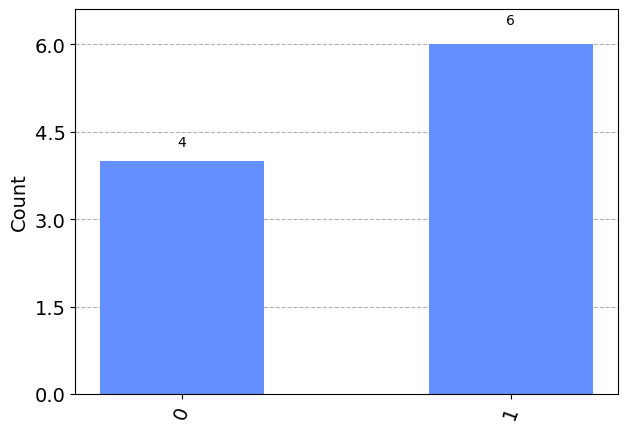

In [14]:
print(q)
demonstrate_measure(q)

Statevector([0.57735027+0.j, 0.81649658+0.j],
            dims=(2,))


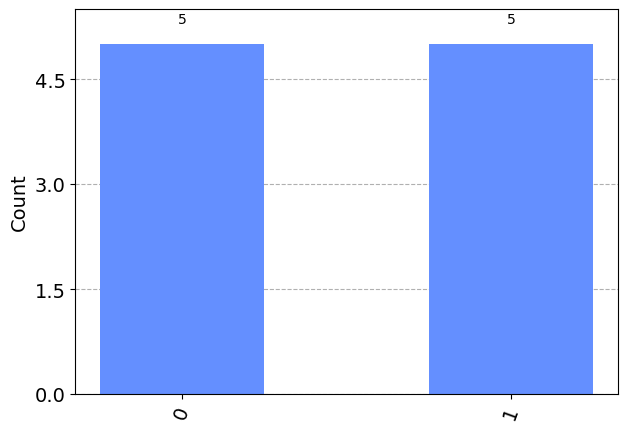

In [15]:
print(q2)
demonstrate_measure(q2)

Statevector([0.40824829-0.40824829j, 0.57735027+0.57735027j],
            dims=(2,))


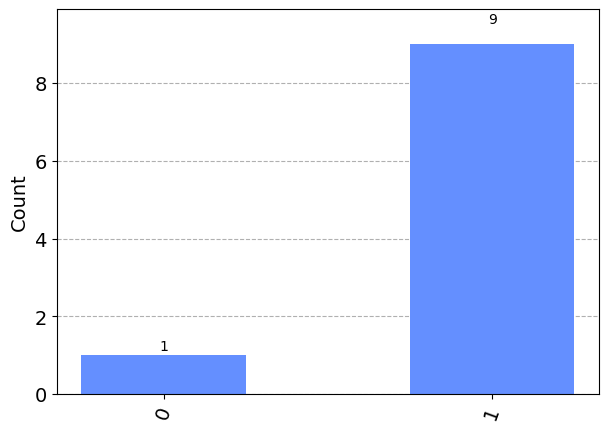

In [16]:
print(q3)
demonstrate_measure(q3)

## Summary

1. We looked at single-qubit systems. Qubits are the classical analogue of bits.
2. Unlike a classical bit, a qubit can be in a superposition of states.
3. To observe the state of a qubit, we must measure it, which stochastically produces a classical result.
4. Next time we'll look at operations on a single qubit.